# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Karthick Ramasubramanian

EID: KR33733

Name: Yashaswini Kalva

EID: YK8348

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum

        self.v = np.zeros(num_of_coefs)

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache = self.gama * self.cache + (1 - self.gama) * gradient**2
        self.coef = self.coef + self.learning_rate * gradient/(self.cache**0.5 + self.eps)
        

    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.v = self.mu * self.v + self.learning_rate * gradient
        self.coef = self.coef + self.v
    

    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                      #please put your codes here
                error =  y[i] - np.dot(X[i], self.coef)

                # Compute gradients
                      #please put your codes here
                gradient = np.multiply(error,X[i]) + self.regularization*self.coef
              
            
#                 self.sgd_momentum(gradient)
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                if update_rule == 'rmsprop':
                    self.rmsprop(gradient)
                

            # print(X)
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X) 
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

        return self.lowest_mse

    def get_features(self, X):
        x = np.zeros((X.shape[0], num_of_coefs))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
        return x
        
    def linearPredict(self, X):
        return np.dot(X, self.coef)

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

# Answer:

In [ ]:
mse_mat = np.zeros((4,3))
a=0
b=0

for i in learning_rate:
    for j in regularization:
        mse_mat[a,b] = LinearRegression(i, j, n_epochs).fit(X,y,'sgd_momentum',False)
        b+=1
    b=0
    a+=1

print('For SQD Momentum \n', mse_mat)


mse_mat = np.zeros((4,3))
a=0
b=0

for i in learning_rate:
    for j in regularization:
        mse_mat[a,b] = LinearRegression(i, j, n_epochs).fit(X,y,'rmsprop',False)
        b+=1
    b=0
    a+=1

print('For RMSProp \n', mse_mat)

<ipython-input-5-2707d9992d80>:65: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
<ipython-input-5-2707d9992d80>:52: RuntimeWarning: overflow encountered in multiply
  gradient = np.multiply(error,X[i]) + self.regularization*self.coef
<ipython-input-5-2707d9992d80>:52: RuntimeWarning: invalid value encountered in multiply
  gradient = np.multiply(error,X[i]) + self.regularization*self.coef
<ipython-input-5-2707d9992d80>:52: RuntimeWarning: invalid value encountered in add
  gradient = np.multiply(error,X[i]) + self.regularization*self.coef


For SQD Momentum 
 [[2.05811442e-002 2.05527046e-002 2.16862191e-002]
 [2.01955352e-002 2.03221703e-002 3.17632177e+005]
 [2.97224810e-001 3.65485181e+004 6.29395496e+108]
 [            nan             nan             nan]]
For RMSProp 
 [[2.12436395e-02 2.12765556e-02 2.39069978e-02]
 [2.02023680e-02 2.04618652e-02 1.09541641e+00]
 [2.96367099e-02 5.15477438e-01 2.03490103e+02]
 [6.04134495e-02 3.03859036e+01 5.56769838e+03]]


learning rate = 0.001 and regularisation = 0


0.020195535187159188

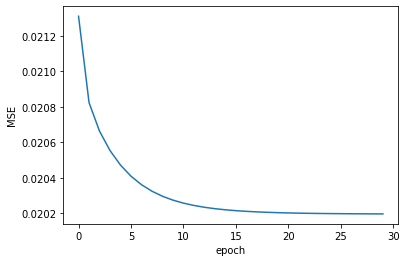

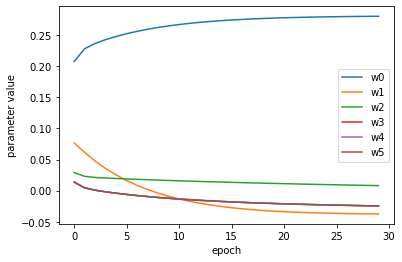

In [ ]:
## For Momemtun best combinations are 
# 1. learning rate = 0.001 and regularisation = 0.00 
# 2. learning rate = 0.001 and regularisation = 0.01

print('learning rate = 0.001 and regularisation = 0')
LinearRegression(0.001, 0, n_epochs).fit(X,y,'sgd_momentum',True)

learning rate = 0.001 and regularisation = 0.01


0.020322170286739723

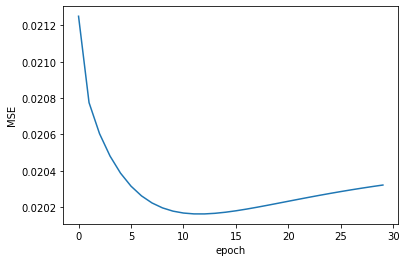

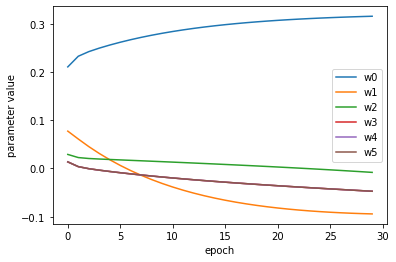

In [ ]:
print('learning rate = 0.001 and regularisation = 0.01')
LinearRegression(0.001, 0.01, n_epochs).fit(X,y,'sgd_momentum',True)

learning rate = 0.0001 and regularisation = 0


0.020202367987353042

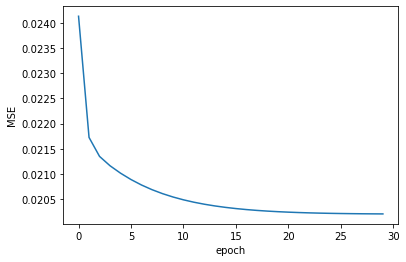

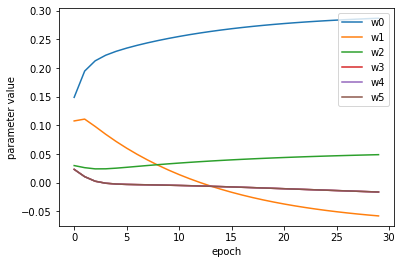

In [ ]:
## For RMSProp best combinations are 
# 1. learning rate = 0.001 and regularisation = 0.00 
# 2. learning rate = 0.001 and regularisation = 0.01

print('learning rate = 0.0001 and regularisation = 0')
LinearRegression(0.001, 0, n_epochs).fit(X,y,'rmsprop',True)

learning rate = 0.0001 and regularisation = 0.01


0.020461865171845044

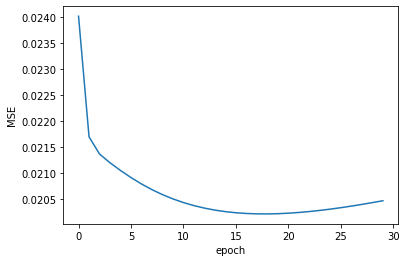

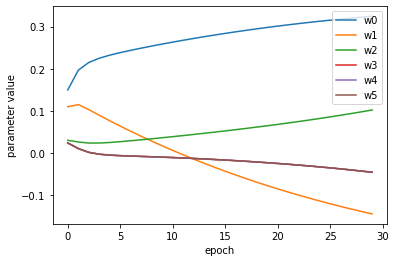

In [ ]:
print('learning rate = 0.0001 and regularisation = 0.01')
LinearRegression(0.001, 0.01, n_epochs).fit(X,y,'rmsprop',True)

Overall, SQD Momentum gives better lowest results (in terms of MSE) compared to RMSProp.  

On using regularization, momemtum converges faster than RMSProp. 
But SGD momentum also overfits faster.  On using more epoch SGD momemtum deviates more aggressively from minimum MSE.

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:
a) The ideal boundry should be x & y axis of a 2-D plane.

Tanh

Test loss 0.173
Training loss 0.197
Tanh effectively is able to make 2 straight line boundries along the diagonal. 


Linear

Test loss 0.508
Training loss 0.495
Linear function is not able to create any boundry and results/predictions are a 50-50 chance.

Linear activation function is not able to make good enough decision boundries

---
b) 

4 Neuron

Test loss 0.123
Training loss 0.114


8 Neuron

Test loss 0.010
Training loss 0.007
The boundries are almost the axis and data is divided into quadrants. 


As the number of neurons is increased, the boundry becomes more flexible.  Meaning the boundry curve bends to fit the data.


---
c) 
Moving from Learning rate 10 to 1 the model is not able to create the boundries (quadrant boundries).  (Learning rate 1 sometimes manages to create the right boundries)  Learing rate of 0.1 and below are almost certain to be able to create the required boundries.  

As expected large learning rate lead to faster convergence.  Learning rate of 10, 1 and 0.1 converge at epoch ~100 or below whereas others need a lot more.  Learning rate of 0.001 needs about 3000 epochs to plateau.


---
d) Using x1 * x2 as a single input, we are able to classify all the quadrants.  
Therefore a simple 1 layer - 1 neuron network with linear activation is good enough to make the boundries.
Test loss 0.001
Training loss 0.001

---




In [1]:
# https://drive.google.com/file/d/1WVRG3bNnZ9b9eEgBuNAYEexirFXJN2MK/view?usp=sharing

![](https://drive.google.com/uc?export=view&id=1WVRG3bNnZ9b9eEgBuNAYEexirFXJN2MK)


# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [ ]:
# install pyod using pip first
# !pip install pyod

In [ ]:
import pandas as pd
import pyod
# Load data code goes here

# from google.colab import files
# uploaded = files.upload()

train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [ ]:
X_train.shape
X_train

array([[ 0.49911143,  0.44467538,  1.57837555,  1.12268564,  1.53393411],
       [ 0.63538539,  2.57035856,  0.16481599,  0.54239916,  1.32897584],
       [ 1.8482115 ,  0.45790446,  1.3836926 ,  2.34707929,  1.22318185],
       ...,
       [-0.62255699,  1.28909658, -1.43653294,  0.710948  , -1.02030956],
       [ 1.12528266, -0.08953836, -0.25349043, -0.38132093,  0.82367755],
       [ 0.13190822, -0.03757996, -2.3025418 ,  1.39193018,  0.3544212 ]])

In [ ]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train

# YOUR CODE SHOULD COME HERE
clf.fit(X_train)

y_train_prediction = clf.labels_
y_train_decision_score = clf.decision_scores_

In [ ]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

# YOUR CODE SHOULD COME HERE
y_test_prediction = clf.predict(X_test)
y_test_decision_score = clf.decision_function(X_test)

evaluate_print(clf, y_train,y_train_decision_score)
evaluate_print(clf, y_test,y_test_decision_score)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.919, precision @ rank n:0.675
MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


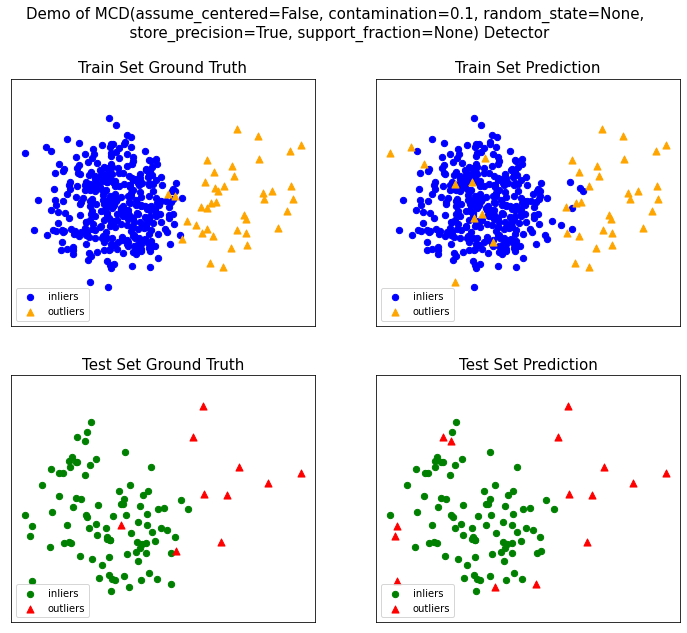

In [ ]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train) # YOUR CODE SHOULD COME HERE
test_principalComponents = pca.fit_transform(X_test) # YOUR CODE SHOULD COME HERE

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()
visualize(clf, train_principalComponents, y_train, test_principalComponents, y_test, y_train_prediction, y_test_prediction)
# YOUR CODE SHOULD COME HERE

CBLOF
CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.909, precision @ rank n:0.7
CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.9056, precision @ rank n:0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


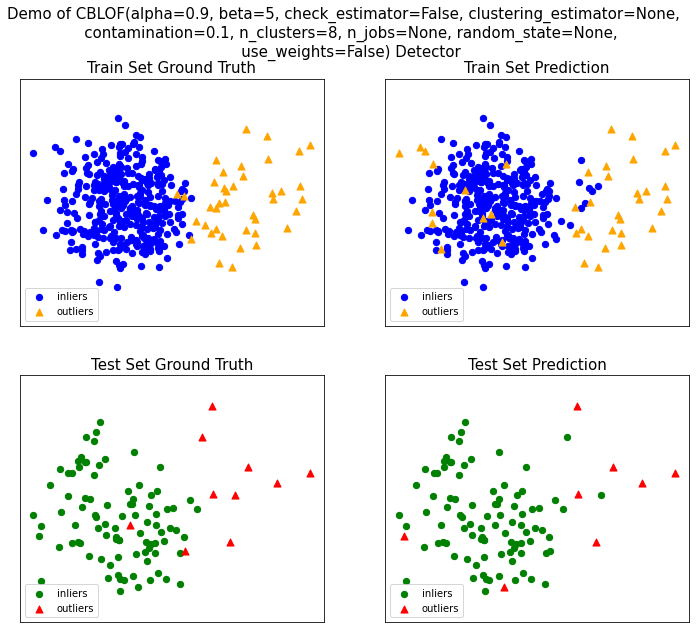



COPOD
CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.9347, precision @ rank n:0.75
CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.8844, precision @ rank n:0.8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


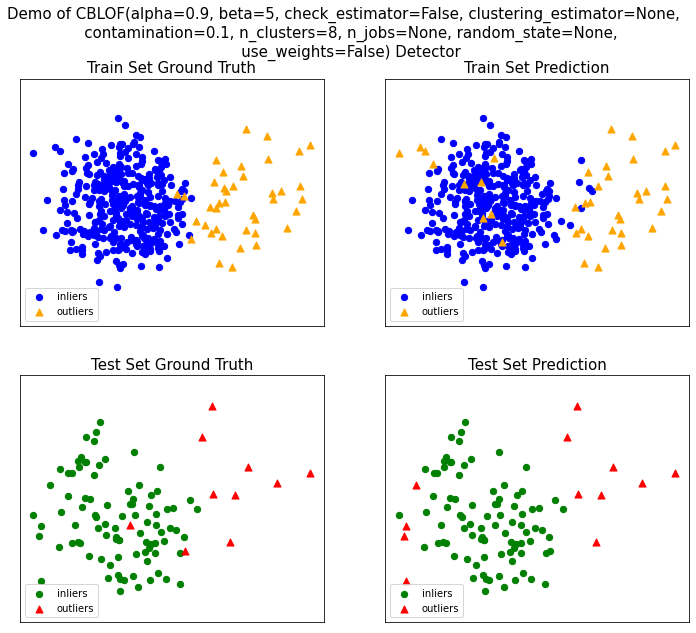

In [ ]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

print('CBLOF')
cblof = CBLOF()
cblof.fit(X_train)
y_train_prediction = cblof.labels_
y_train_decision_score = cblof.decision_scores_
y_test_prediction = cblof.predict(X_test)
y_test_decision_score = cblof.decision_function(X_test)
evaluate_print(cblof, y_train,y_train_decision_score)
evaluate_print(cblof, y_test,y_test_decision_score)
visualize(cblof, train_principalComponents, y_train, test_principalComponents, y_test, y_train_prediction, y_test_prediction)
print('\n')

print('COPOD')
copod = CBLOF()
copod.fit(X_train)
y_train_prediction = copod.labels_
y_train_decision_score = copod.decision_scores_
y_test_prediction = copod.predict(X_test)
y_test_decision_score = copod.decision_function(X_test)
evaluate_print(copod, y_train,y_train_decision_score)
evaluate_print(copod, y_test,y_test_decision_score)
visualize(copod, train_principalComponents, y_train, test_principalComponents, y_test, y_train_prediction, y_test_prediction)

#Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

Pricipal Components are vectors in the feature space that captures the most variance in the  dataset.  Each principal component in orthogonal to each other.  The 1st PC captures the most variance followed by the 2nd and so on.

The idea behind this algorithm is that the entire feature space if correlated to each other can be represented into few pricipal components (fewer than the number of variables) and hence reduces the dimentionality of the problem.

Also, since the each pricipal component is orthogonal to each other, we also avoid the problem of multicollinearity.



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [ ]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

# from google.colab import files
# uploaded = files.upload()

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [ ]:
data.isnull().sum(axis = 0)

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [ ]:
data_dm = data.copy()
data_dm['binned_yr_built'] = pd.cut(data_dm['YearBuilt'],bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020],labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],include_lowest=True)

In [ ]:
pd.get_dummies(data_dm['binned_yr_built'])

,1900-1920,1920-1940,1940-1960,1960-1980,1980-2000,2000-2020
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,1,0,0
1457,0,0,1,0,0,0
1458,0,0,1,0,0,0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [ ]:
cols=data.isnull().sum(axis = 0)
cols2=cols/data.shape[0]<0.65
cols2[cols2].index
## DataFrame with only < 65% non null columns
data_dm[cols2[cols2].index]

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,6,8,1976,1976,0.0,TA,...,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,7,5,1915,1970,0.0,TA,...,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,84.0,14260,8,5,2000,2000,350.0,Gd,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,6,5,1999,2000,0.0,TA,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,RL,85.0,13175,6,6,1978,1988,119.0,TA,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,RL,66.0,9042,7,9,1941,2006,0.0,Ex,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,RL,68.0,9717,5,6,1950,1996,0.0,TA,...,366,0,112,0,0,0,0,4,2010,142125



d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [ ]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean
print('Sample Mean ', sample_ages.mean())
#Population mean
print('Population Mean ', data['SalePrice'].mean())

Sample Mean  178292.63125
Population Mean  180921.19589041095


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [ ]:
import scipy.stats

In [ ]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)

sample_mean = sample.mean()

#Get the critical Z value
z_critical = scipy.stats.norm.ppf(.05)

#Get population standard deviation

pop_stdev = np.std(data_dm['SalePrice'])

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean + margin_of_error,
                       sample_mean - margin_of_error)  

#Print confidence interval and true mean value
print('True mean = ',data_dm['SalePrice'].mean() )
print('Confidence Interval: ', confidence_interval )



True mean =  180921.19589041095
Confidence Interval:  (169029.8769105792, 195155.1830894208)


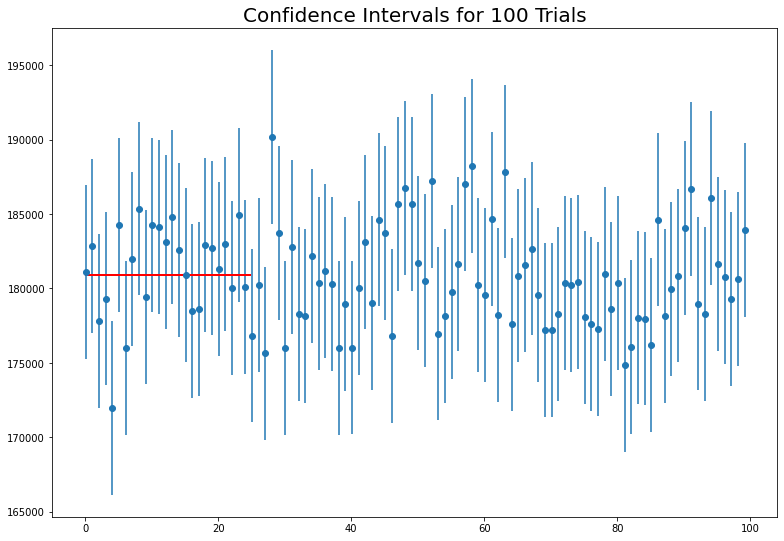

In [ ]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    z_critical = scipy.stats.norm.ppf(.05)
    # compute population standard deviation     
    pop_stdev = np.std(data_dm['SalePrice'])

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()